### Proyecto análisis coste del alquiler en Barcelona

- El presente análisis tiene como objetivo principal proporcionar a los habitantes de Barcelona una visión clara y detallada de la evolución del precio del alquiler en la ciudad durante los últimos años, específicamente entre 2020 y 2023. En este período, se han observado importantes cambios en el mercado inmobiliario, con fluctuaciones significativas que afectan directamente a la economía de los residentes.

- El estudio se enfoca en identificar las tendencias de precios en diferentes distritos, considerando factores como la media del alquiler por metro cuadrado y las disparidades salariales entre las distintas zonas. Con este análisis, se pretende brindar información útil para que los ciudadanos puedan tomar decisiones más informadas sobre dónde vivir o cómo planificar sus finanzas personales en relación con el costo de la vivienda.

- Además, el informe busca resaltar las áreas más accesibles y equilibradas, así como aquellas que presentan mayores desafíos para los inquilinos. Este conocimiento puede ser de utilidad no solo para los residentes, sino también para responsables de políticas públicas, inversores y otros interesados en el mercado inmobiliario de Barcelona.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_2020= pd.read_csv('Alquiler/2020_preu.csv')
df_2021= pd.read_csv('Alquiler/2021_preu.csv')
df_2022= pd.read_csv('Alquiler/2022_preu.csv')
df_2023= pd.read_csv('Alquiler/2023_preu.csv')



# Concatenar las tablas

df1= pd.concat([df_2020, df_2021,df_2022, df_2023])

In [4]:
df1.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2020,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),864.5
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),1110.2
2,2020,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),899.5
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),1030.0
4,2020,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),1059.9


In [5]:
# filtrar por alquiler mensual

df_mes = df1[(df1['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)')]

In [6]:
df_mes.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2020,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),864.5
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),1110.2
2,2020,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),899.5
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),1030.0
4,2020,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),1059.9


In [7]:
df_mes.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              48
dtype: int64

In [8]:
df_mes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 218
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             949 non-null    int64 
 1   Trimestre       949 non-null    int64 
 2   Codi_Districte  949 non-null    int64 
 3   Nom_Districte   949 non-null    object
 4   Codi_Barri      949 non-null    int64 
 5   Nom_Barri       949 non-null    object
 6   Lloguer_mitja   949 non-null    object
 7   Preu            901 non-null    object
dtypes: int64(4), object(4)
memory usage: 66.7+ KB


In [9]:
df_mes['Preu'] = pd.to_numeric(df_mes['Preu'], errors='coerce')

C:\Users\gemas\AppData\Local\Temp\ipykernel_14804\555317758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['Preu'] = pd.to_numeric(df_mes['Preu'], errors='coerce')


In [10]:
# Calcular la media ignorando los valores nulos
mean_value = np.nanmean(df_mes['Preu'])

# Reemplazar los valores nulos con la media
df_mes['Preu'] = np.where(df_mes['Preu'].isnull(), mean_value, df_mes['Preu'])

C:\Users\gemas\AppData\Local\Temp\ipykernel_14804\110730073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['Preu'] = np.where(df_mes['Preu'].isnull(), mean_value, df_mes['Preu'])


In [11]:
df_mes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 218
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             949 non-null    int64  
 1   Trimestre       949 non-null    int64  
 2   Codi_Districte  949 non-null    int64  
 3   Nom_Districte   949 non-null    object 
 4   Codi_Barri      949 non-null    int64  
 5   Nom_Barri       949 non-null    object 
 6   Lloguer_mitja   949 non-null    object 
 7   Preu            949 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 66.7+ KB


In [12]:
media_pago_district = df_mes.groupby(['Any','Nom_Districte'])['Preu'].mean().reset_index()

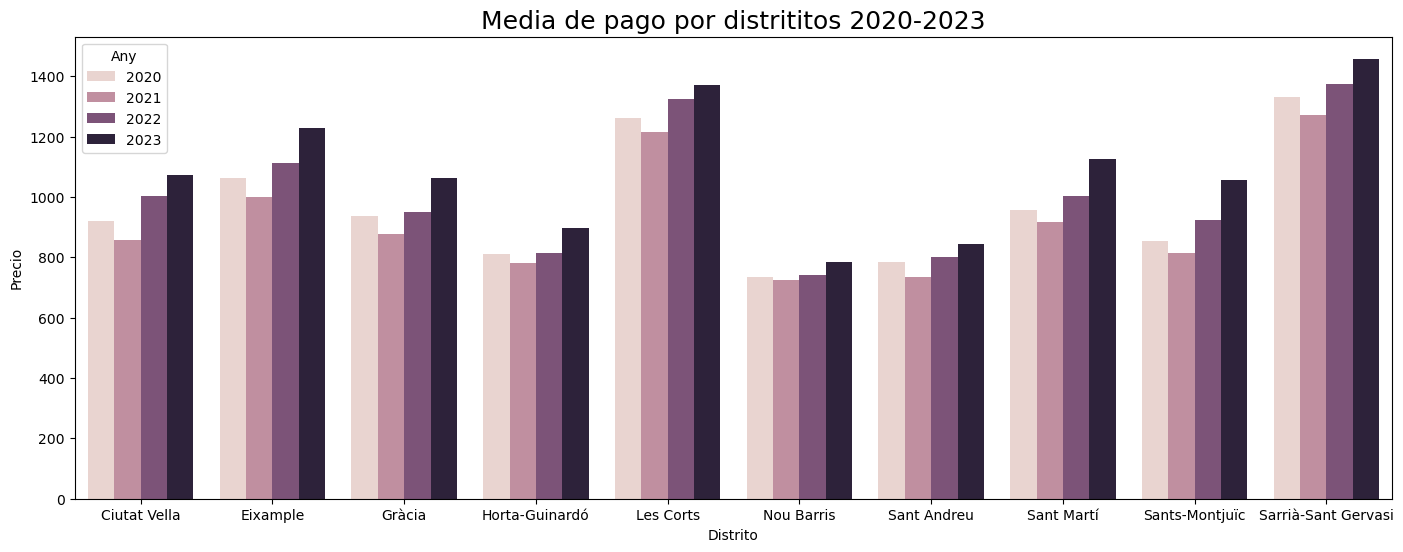

In [131]:
plt.figure(figsize=(17,6))
sns.barplot(data=media_pago_district, x='Nom_Districte', y='Preu', hue='Any')
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.title('Media de pago por distrititos 2020-2023', fontsize=18)
plt.show()

El distrito con la media más alta de pago por alquiler es Sarrià -Sant Gervasi. Desde el año 2020 hasta el año 2023 siempre fue el distrito con el importe de alquieler más alto. Ya para el 2023, tenía una media de más de 1400 € de alquieler. El otro distrito con un coste de alquier más alto es Les Corts, para el 2023 la media estaba en 1350 €. El distrito de menor coste en el alquiler, es Nou Barris, con una media de 800 € en el 2023. Otro distriro con un alquiler de media más bajo sería Sant Andreu, con un pago medio de 820 € de alquiler al mes. 


In [14]:
df_2020= pd.read_csv('2020_cont.csv')
df_2021= pd.read_csv('2021_cont.csv')
df_2022= pd.read_csv('2022_cont.csv')
df_2023= pd.read_csv('2023_cont.csv')



# Concatenar las tablas

df2= pd.concat([df_2020, df_2021,df_2022, df_2023])

In [15]:
df2.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Contractes,Nombre
0,2020,1,1,Ciutat Vella,1,el Raval,Contractes de lloguer,485
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,Contractes de lloguer,229
2,2020,1,1,Ciutat Vella,3,la Barceloneta,Contractes de lloguer,83
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Contractes de lloguer,276
4,2020,1,2,Eixample,5,el Fort Pienc,Contractes de lloguer,245


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 0 to 147
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             962 non-null    int64 
 1   Trimestre       962 non-null    int64 
 2   Codi_Districte  962 non-null    int64 
 3   Nom_Districte   962 non-null    object
 4   Codi_Barri      962 non-null    int64 
 5   Nom_Barri       962 non-null    object
 6   Contractes      962 non-null    object
 7   Nombre          962 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 67.6+ KB


In [17]:
df2 = df2[(df2['Nom_Districte']!='No consta')]

In [18]:
media_contractos = df2.groupby(['Any','Nom_Districte'])['Nombre'].mean().reset_index()

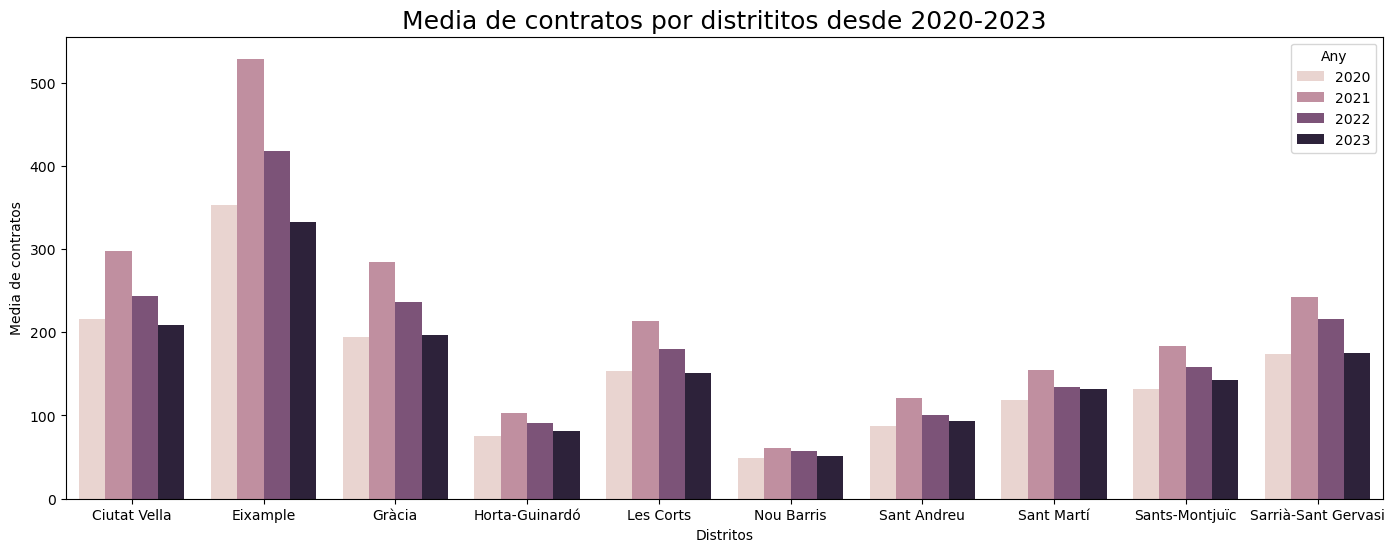

In [135]:
plt.figure(figsize=(17,6))
sns.barplot(data=media_contractos, x='Nom_Districte', y='Nombre', hue='Any')
plt.xlabel('Distritos')
plt.ylabel('Media de contratos')
plt.title('Media de contratos por distrititos desde 2020-2023', fontsize=18)
plt.show()

Se observa que a medida que han trasncurrido los años, el número de contratos firmados se ha ido reduciendo. De hecho, el año con mayor número de contratos, fue el 2021; justamente posterior a la pandemia. Es curioso, que también en el 2021 el precio medio del alquiler fue el más bajo de todos en comparación con los años 2020, 2022 y 2023.
- ¿Puede ser este un indicativo de que el coste de la vivienda es una de las principales causas negativas en el número de contratos?

El distrito donde mayor números de contratos se han formado, es el de Eixample en el 2023 han contado con una media de 320 contratos realizados. En cambio, aún y teniendo el precio medio de alquileres más bajos; el distrito con menor firma de contratos en el 2023, fue Nou Barris, con menos de 60 contratos firmados en el 2023. 

In [20]:
df_2020= pd.read_csv('2020_sup.csv')
df_2021= pd.read_csv('2021_sup.csv')
df_2022= pd.read_csv('2022_sup.csv')
df_2023= pd.read_csv('2023_sup.csv')



# Concatenar las tablas

df3= pd.concat([df_2020, df_2021,df_2022, df_2023])

In [21]:
df3.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Superfície_mitjana,Nombre
0,2020,1,1,Ciutat Vella,1,el Raval,m2_construïts,62.8
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,m2_construïts,87.4
2,2020,1,1,Ciutat Vella,3,la Barceloneta,m2_construïts,53.9
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",m2_construïts,76.2
4,2020,1,2,Eixample,5,el Fort Pienc,m2_construïts,76.4


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 145
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Any                 949 non-null    int64 
 1   Trimestre           949 non-null    int64 
 2   Codi_Districte      949 non-null    int64 
 3   Nom_Districte       949 non-null    object
 4   Codi_Barri          949 non-null    int64 
 5   Nom_Barri           949 non-null    object
 6   Superfície_mitjana  949 non-null    object
 7   Nombre              934 non-null    object
dtypes: int64(4), object(4)
memory usage: 66.7+ KB


In [23]:
df3['Nombre'] = pd.to_numeric(df3['Nombre'], errors='coerce')

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 145
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Any                 949 non-null    int64  
 1   Trimestre           949 non-null    int64  
 2   Codi_Districte      949 non-null    int64  
 3   Nom_Districte       949 non-null    object 
 4   Codi_Barri          949 non-null    int64  
 5   Nom_Barri           949 non-null    object 
 6   Superfície_mitjana  949 non-null    object 
 7   Nombre              929 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 66.7+ KB


In [25]:
# Calcular la media ignorando los valores nulos
mean_value = np.nanmean(df3['Nombre'])

# Reemplazar los valores nulos con la media
df3['Nombre'] = np.where(df3['Nombre'].isnull(), mean_value, df3['Nombre'])

In [26]:
media_m2 = df3.groupby(['Any','Nom_Districte'])['Nombre'].mean().reset_index()

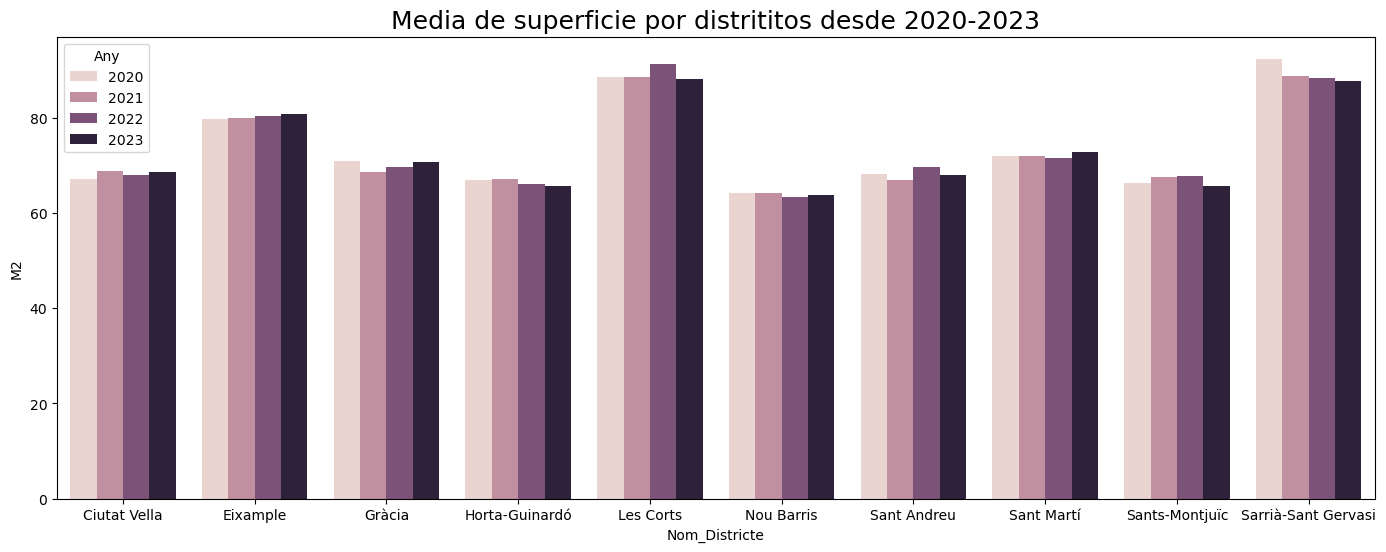

In [62]:
plt.figure(figsize=(17,6))
sns.barplot(data=media_m2, x='Nom_Districte', y='Nombre', hue='Any')
plt.ylabel('M2')
plt.title('Media de superficie por distrititos desde 2020-2023', fontsize=18)
plt.show()

Los distritos con pisos de m2 más grandes, son Les Corts y Sarrià. Esto tiene una lógica, puesto que estos distritos son los que también mayor coste de media de alquiler han presentado. En el caso de Nou Barris la media de m2 es un poco más baja en comparación con la media del resto de distritos.
- ¿Puede ser esta la causa de que en Sant Andreu el número de contratos sea menor?
- ¿Prefieres las personas pagar más por una vivienda más amplia o se trata por la distancia que tiene este distrito?

In [28]:
df_salary = pd.read_csv('Taula_salari.csv')

In [30]:
df_salary = df_salary.reset_index()

In [31]:
df_sal = df_salary[['Territori','2016','2017','2018','2019','2020','2021','2022']]

In [32]:
df_sal.head()

,Territori,2016,2017,2018,2019,2020,2021,2022
0,Espanya,23676.97713,24416.34199,24908.63827,24695.10287,24411.07676,25552.32916,26765.05248
1,Catalunya,25490.66149,26525.69126,27148.14189,27024.23438,26716.11521,28076.28000,29312.90997
2,Barcelona,29176.04703,30262.70554,30807.39351,31076.48696,30593.33729,32324.05662,33837.31775
3,Ciutat Vella,20969.02348,22244.34036,22404.54444,22528.77680,20542.76570,23284.72193,24920.91798
4,Eixample,31930.49291,33959.18402,34575.70162,34770.24203,34655.47145,35814.92415,38261.03669


In [33]:
df_sal.columns

Index(['Territori', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object')

In [91]:
df_sal = df_sal[(df_sal['Territori']!='Espanya')]

In [92]:
df_sal = df_sal[(df_sal['Territori']!='Catalunya')]

In [93]:
df_sal = df_sal[(df_sal['Territori']!='Barcelona')]

In [96]:
sal_anual = df_sal.groupby('Territori')[['2016','2017','2018','2019','2020','2021','2022']].mean()

In [34]:
tabla_sal = df_sal.T

In [35]:
tabla_sal.columns = tabla_sal.iloc[0]

In [36]:
tabla_sal.head()

Territori,Espanya,Catalunya,Barcelona,Ciutat Vella,Eixample,Sants - Montjuïc,Les Corts,Sarrià - Sant Gervasi,Gràcia,Horta - Guinardó,Nou Barris,Sant Andreu,Sant Martí
Territori,Espanya,Catalunya,Barcelona,Ciutat Vella,Eixample,Sants - Montjuïc,Les Corts,Sarrià - Sant Gervasi,Gràcia,Horta - Guinardó,Nou Barris,Sant Andreu,Sant Martí
2016,23676.97713,25490.66149,29176.04703,20969.02348,31930.49291,25966.55797,36834.39679,46093.24815,30087.81371,27594.1367,21034.37822,25962.43546,28996.90319
2017,24416.34199,26525.69126,30262.70554,22244.34036,33959.18402,26982.67492,37898.50791,46021.84782,31214.14367,28342.38718,22247.34706,27037.9611,29998.38229
2018,24908.63827,27148.14189,30807.39351,22404.54444,34575.70162,27357.47686,38575.23259,47395.96658,32302.24381,28833.80036,22444.53347,27715.64374,30556.16752
2019,24695.10287,27024.23438,31076.48696,22528.7768,34770.24203,27350.32654,41548.2448,49195.74946,33576.50663,29222.56519,22844.49661,27877.48225,30647.73736


In [37]:
tabla_sal.columns

Index(['Espanya', 'Catalunya', 'Barcelona', 'Ciutat Vella', 'Eixample',
       'Sants - Montjuïc', 'Les Corts', 'Sarrià - Sant Gervasi', 'Gràcia',
       'Horta - Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí'],
      dtype='object', name='Territori')

In [38]:
df_salario = tabla_sal[1:]

In [39]:
df_salario = df_salario.copy() 
df_salario.rename(index={'Territori': 'Año'}, inplace=True)


In [44]:
df4 = df_salario.reset_index()

In [49]:
df4.rename(columns={'index': 'Año'}, inplace=True)

In [50]:
df4

Territori,Año,Espanya,Catalunya,Barcelona,Ciutat Vella,Eixample,Sants - Montjuïc,Les Corts,Sarrià - Sant Gervasi,Gràcia,Horta - Guinardó,Nou Barris,Sant Andreu,Sant Martí
0,2016,23676.97713,25490.66149,29176.04703,20969.02348,31930.49291,25966.55797,36834.39679,46093.24815,30087.81371,27594.1367,21034.37822,25962.43546,28996.90319
1,2017,24416.34199,26525.69126,30262.70554,22244.34036,33959.18402,26982.67492,37898.50791,46021.84782,31214.14367,28342.38718,22247.34706,27037.9611,29998.38229
2,2018,24908.63827,27148.14189,30807.39351,22404.54444,34575.70162,27357.47686,38575.23259,47395.96658,32302.24381,28833.80036,22444.53347,27715.64374,30556.16752
3,2019,24695.10287,27024.23438,31076.48696,22528.7768,34770.24203,27350.32654,41548.2448,49195.74946,33576.50663,29222.56519,22844.49661,27877.48225,30647.73736
4,2020,24411.07676,26716.11521,30593.33729,20542.7657,34655.47145,26304.73707,38985.30789,49185.12548,32618.96623,28310.7816,22600.3541,27357.96773,30694.91091
5,2021,25552.32916,28076.28,32324.05662,23284.72193,35814.92415,28490.26248,39980.88938,51614.65645,35061.94947,29643.17466,23509.74591,29203.44409,32381.28912
6,2022,26765.05248,29312.90997,33837.31775,24920.91798,38261.03669,29894.31335,42831.82727,54998.56095,35923.29474,30695.70447,24784.87086,30326.18749,33611.37185


In [80]:
df4 = df4[['Año','Ciutat Vella','Eixample','Sants - Montjuïc','Les Corts','Sarrià - Sant Gervasi','Gràcia','Horta - Guinardó','Nou Barris','Sant Andreu','Sant Martí']]

In [87]:
salario_territorio = df4.groupby(['Ciutat Vella','Eixample','Sants - Montjuïc','Les Corts','Sarrià - Sant Gervasi','Gràcia','Horta - Guinardó','Nou Barris','Sant Andreu','Sant Martí'])['Año'].mean()

In [88]:
salario_territorio

Ciutat Vella  Eixample     Sants - Montjuïc  Les Corts    Sarrià - Sant Gervasi  Gràcia       Horta - Guinardó  Nou Barris   Sant Andreu  Sant Martí 
20542.76570   34655.47145  26304.73707       38985.30789  49185.12548            32618.96623  28310.78160       22600.35410  27357.96773  30694.91091    2020.0
20969.02348   31930.49291  25966.55797       36834.39679  46093.24815            30087.81371  27594.13670       21034.37822  25962.43546  28996.90319    2016.0
22244.34036   33959.18402  26982.67492       37898.50791  46021.84782            31214.14367  28342.38718       22247.34706  27037.96110  29998.38229    2017.0
22404.54444   34575.70162  27357.47686       38575.23259  47395.96658            32302.24381  28833.80036       22444.53347  27715.64374  30556.16752    2018.0
22528.77680   34770.24203  27350.32654       41548.24480  49195.74946            33576.50663  29222.56519       22844.49661  27877.48225  30647.73736    2019.0
23284.72193   35814.92415  28490.26248       39980

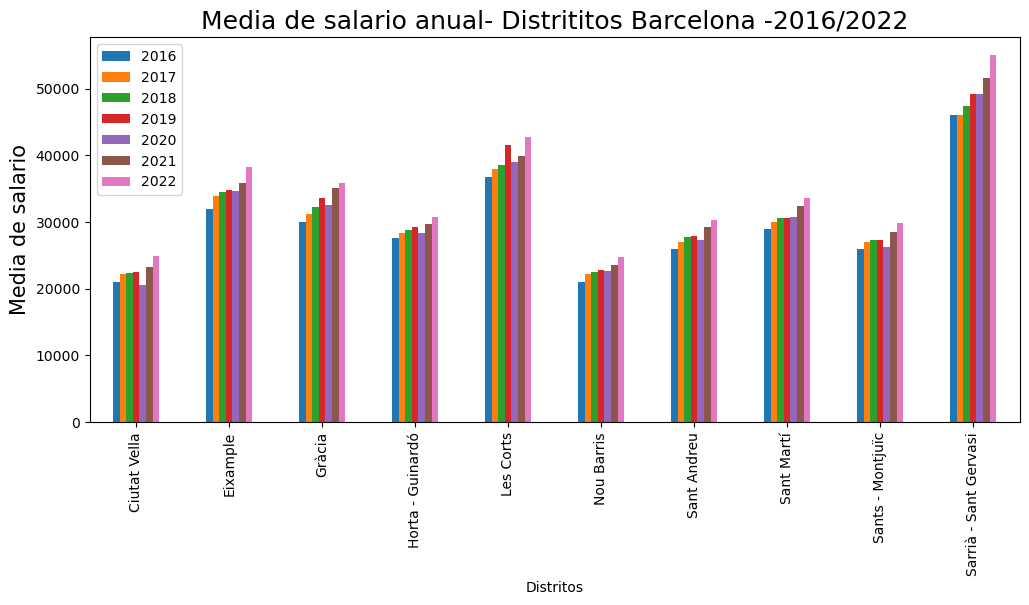

In [134]:

sal_anual.plot(kind='bar',figsize=(12,5))
plt.xlabel('Distritos')
plt.ylabel('Media de salario',fontsize=15)
plt.title('Media de salario anual- Distrititos Barcelona -2016/2022', fontsize=18)
plt.show()

Al observar la anterior gráfica, se entiende que los distritos con una salario medio anaul más alto son Sarria (+ de 55.000€) seguido de Les Corts(40.000 €). Los distritos que tiene un salario medio anual más bajo, son Nou Barris(23.000€) y también en este caso Ciutat Vella(25.000€). En el caso de ciutat vella sorprende que la media del salario anual sean tan baja, al mirar que el alquiler en el 2023 ya superaba los 1100 € de media.

Nota: Lamentablemente, desde el año 2022 no se publican en el ayuntamiento esta información, por ello el análisis se puede realizar hasta dicho año.

In [142]:
df4.head()

Territori,Año,Ciutat Vella,Eixample,Sants - Montjuïc,Les Corts,Sarrià - Sant Gervasi,Gràcia,Horta - Guinardó,Nou Barris,Sant Andreu,Sant Martí
0,2016,20969.02348,31930.49291,25966.55797,36834.39679,46093.24815,30087.81371,27594.1367,21034.37822,25962.43546,28996.90319
1,2017,22244.34036,33959.18402,26982.67492,37898.50791,46021.84782,31214.14367,28342.38718,22247.34706,27037.9611,29998.38229
2,2018,22404.54444,34575.70162,27357.47686,38575.23259,47395.96658,32302.24381,28833.80036,22444.53347,27715.64374,30556.16752
3,2019,22528.7768,34770.24203,27350.32654,41548.2448,49195.74946,33576.50663,29222.56519,22844.49661,27877.48225,30647.73736
4,2020,20542.7657,34655.47145,26304.73707,38985.30789,49185.12548,32618.96623,28310.7816,22600.3541,27357.96773,30694.91091


In [157]:
(df4['Ciutat Vella']+df4['Eixample']+df4['Sants - Montjuïc']+df4['Les Corts']+df4['Sarrià - Sant Gervasi']+df4['Gràcia']+df4['Horta - Guinardó']+df4['Nou Barris']+df4['Sant Andreu']+df4['Sant Martí'])

0    295469.38658
1    305946.77633
2    312161.31099
3    319562.12767
4    311256.38816
5    328985.05764
6    346248.08565
dtype: object

In [158]:
columnas = ['Ciutat Vella', 'Eixample', 'Sants - Montjuïc', 'Les Corts','Sarrià - Sant Gervasi', 
            'Gràcia', 'Horta - Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí']

df4['Suma_total'] = df4[columnas].sum(axis=1)

C:\Users\gemas\AppData\Local\Temp\ipykernel_14804\3995867789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Suma_total'] = df4[columnas].sum(axis=1)


In [165]:
df4['Media_ganancia7'] = (df4['Suma_total']/7)

C:\Users\gemas\AppData\Local\Temp\ipykernel_14804\4173470913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Media_ganancia7'] = (df4['Suma_total']/7)


In [166]:
df4.head()

Territori,Año,Ciutat Vella,Eixample,Sants - Montjuïc,Les Corts,Sarrià - Sant Gervasi,Gràcia,Horta - Guinardó,Nou Barris,Sant Andreu,Sant Martí,Suma_total,Media_ganancia7
0,2016,20969.02348,31930.49291,25966.55797,36834.39679,46093.24815,30087.81371,27594.1367,21034.37822,25962.43546,28996.90319,295469.38658,42209.912369
1,2017,22244.34036,33959.18402,26982.67492,37898.50791,46021.84782,31214.14367,28342.38718,22247.34706,27037.9611,29998.38229,305946.77633,43706.682333
2,2018,22404.54444,34575.70162,27357.47686,38575.23259,47395.96658,32302.24381,28833.80036,22444.53347,27715.64374,30556.16752,312161.31099,44594.472999
3,2019,22528.7768,34770.24203,27350.32654,41548.2448,49195.74946,33576.50663,29222.56519,22844.49661,27877.48225,30647.73736,319562.12767,45651.732524
4,2020,20542.7657,34655.47145,26304.73707,38985.30789,49185.12548,32618.96623,28310.7816,22600.3541,27357.96773,30694.91091,311256.38816,44465.198309


In [167]:
(df4['Media_ganancia7']/12)

0    3517.492697
1    3642.223528
2    3716.206083
3    3804.311044
4    3705.433192
5    3916.488781
6     4122.00102
Name: Media_ganancia7, dtype: object

In [101]:
result = pd.merge(
    df_mes,
    df3[['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Superfície_mitjana','Nombre']],
    on=['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'],
    how='inner'
)

In [103]:
df5 = result

In [104]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Any                 949 non-null    int64  
 1   Trimestre           949 non-null    int64  
 2   Codi_Districte      949 non-null    int64  
 3   Nom_Districte       949 non-null    object 
 4   Codi_Barri          949 non-null    int64  
 5   Nom_Barri           949 non-null    object 
 6   Lloguer_mitja       949 non-null    object 
 7   Preu                949 non-null    float64
 8   Superfície_mitjana  949 non-null    object 
 9   Nombre              949 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 74.3+ KB


In [105]:
df5.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Superfície_mitjana,Nombre
0,2020,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),864.5,m2_construïts,62.8
1,2020,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),1110.2,m2_construïts,87.4
2,2020,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),899.5,m2_construïts,53.9
3,2020,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),1030.0,m2_construïts,76.2
4,2020,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),1059.9,m2_construïts,76.4


<Axes: xlabel='Nombre', ylabel='Preu'>

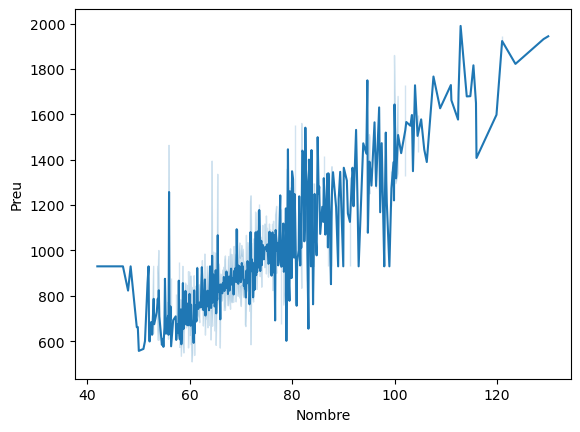

In [107]:
sns.lineplot(data=df5, x='Nombre', y='Preu')

In [109]:
precio_medio_m2 = df5.groupby('Nombre')['Preu'].mean()

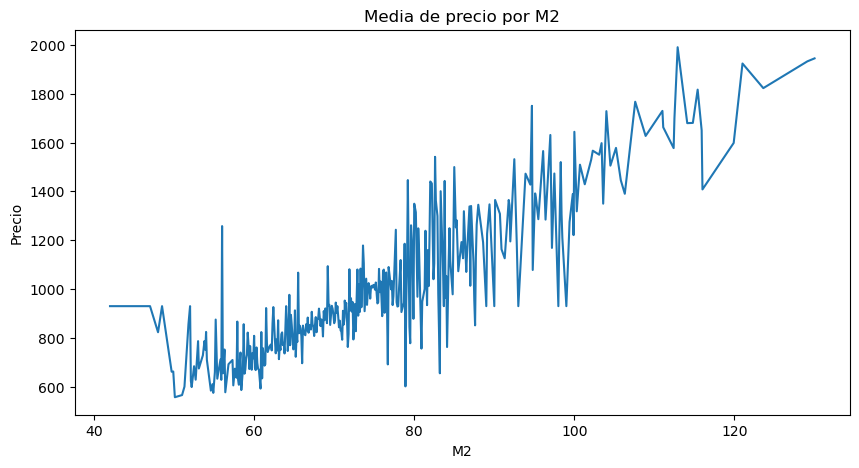

In [114]:
plt.figure(figsize=(10,5))
sns.lineplot(data= precio_medio_m2)
plt.xlabel('M2')
plt.ylabel('Precio')
plt.title('Media de precio por M2')
plt.show()

C:\Users\gemas\data\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


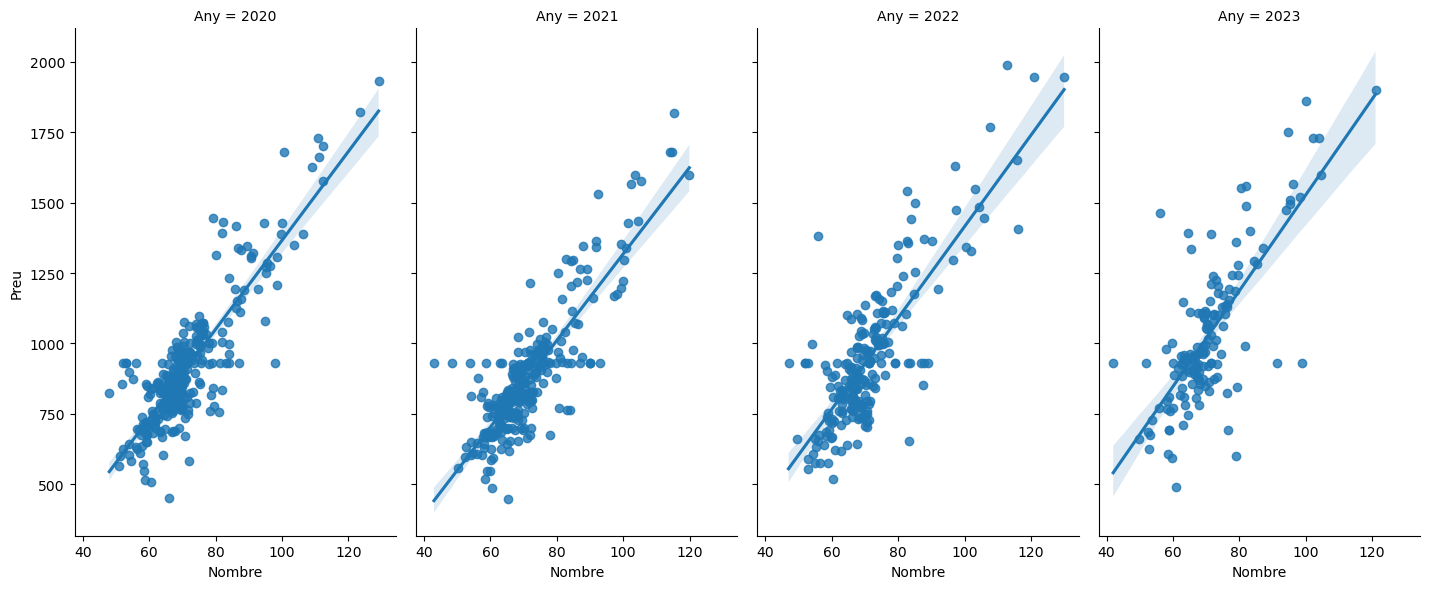

In [128]:

sns.lmplot(data=df5, x='Nombre', y='Preu', col='Any', height=6,  aspect=0.6)

C:\Users\gemas\AppData\Local\Temp\ipykernel_14804\1980180059.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data= df5, x='Nombre', y='Preu', hue='Any', palette=palette)


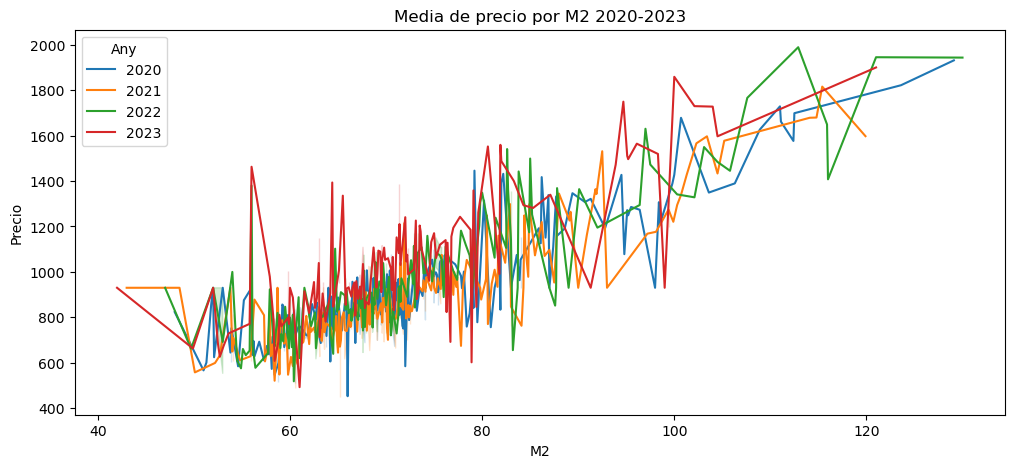

In [141]:
plt.figure(figsize=(12,5))
palette = sns.color_palette("tab10")
sns.lineplot(data= df5, x='Nombre', y='Preu', hue='Any', palette=palette)
plt.xlabel('M2')
plt.ylabel('Precio')
plt.title('Media de precio por M2 2020-2023')
plt.show()